<ins><b>Deep Learning</b></ins>

<ins><b>Name :</b></ins> Jeevan Sendur G

<ins><b>Registration No.:</b></ins> CH.EN.U4AIE22020

<ins><b>Lab - 1 :</b></ins> Implementation of Perceptron from scratch

# Key components of the Lab Experiment

1. Reading the dataset
2. Exploratory Data Analsis
3. Pre-processing
4. Test-Train Split
5. Implementation of the Perceptron
6. Tuning the number of epochs
7. Final Model
8. References

# Importing the required modules

In [2]:
# Modules used for data handling and linear algebra operations.
import pandas as pd
import numpy as np

# Modules used for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

# Modules used for encoding the categorical variables.
from sklearn.preprocessing import OneHotEncoder

# Reading the dataset

In [4]:
df = pd.read_csv("credit+approval\crx.data",header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


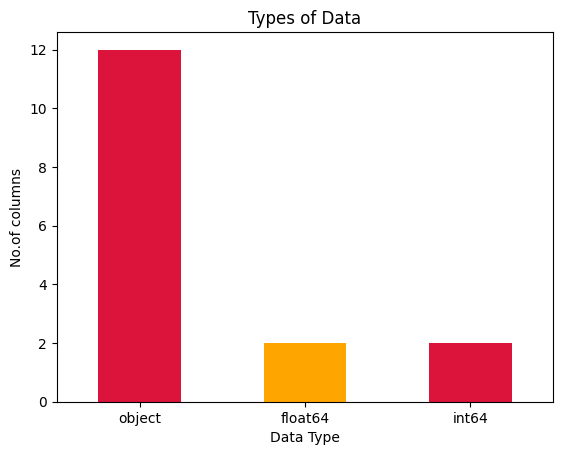

In [7]:
df.dtypes.value_counts().plot(kind="bar",
                              title="Types of Data",
                              xlabel="Data Type",
                              ylabel="No.of columns",
                              rot=0,
                              color=["crimson","orange"])
plt.show()

The dataset has mainly categorical variables and few numericals variables.

# Exploratory Data Analysis

In Exploratory Data Analysis the following parts are included:
1. Seggragation of columns (into categorical and numerical)
2. Analysis of Missing Values
3. Target Variable Class Distribution

## Seggregating columns

The columns with data type as Object are considered as categorical while others are considered as numerical.

In [8]:
cat_cols = []
num_cols = []

for i in df.columns:
    if df[i].dtype == "O":
        cat_cols.append(i)
    else:
        num_cols.append(i)

## Missing Values Analysis

Since, the UCI data repository mentions missing values as "?" instead of null values the analysis has to be carried out accordingly.

In [9]:
null_freq = []
for i in df.columns:
    f = dict(df[i].value_counts())
    if "?" in f.keys():
        null_freq.append(f["?"]*100/len(df))
    else:
        null_freq.append(0)

Only 2% of the rows have null values and hence the rows can be dropped directly instead of applying any imputation techniques.

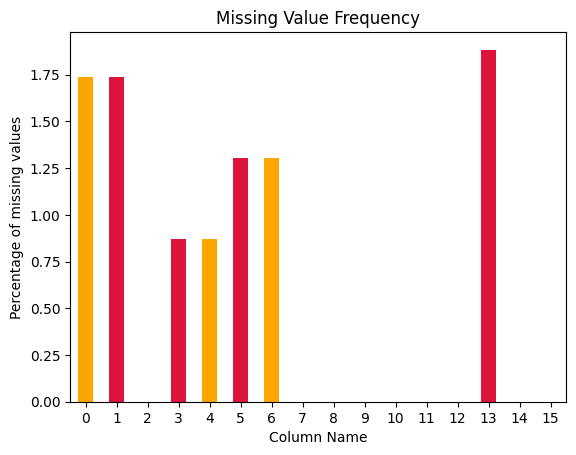

In [10]:
pd.Series(dict(zip(df.columns,null_freq))).plot(kind="bar",
                                                rot=0,
                                                title="Missing Value Frequency",
                                                xlabel="Column Name",
                                                ylabel="Percentage of missing values",
                                                color=["orange","crimson"])
plt.show()

## Target Variable Analysis

The dataset is slightly biased towards "-" class since has significantly more entries.

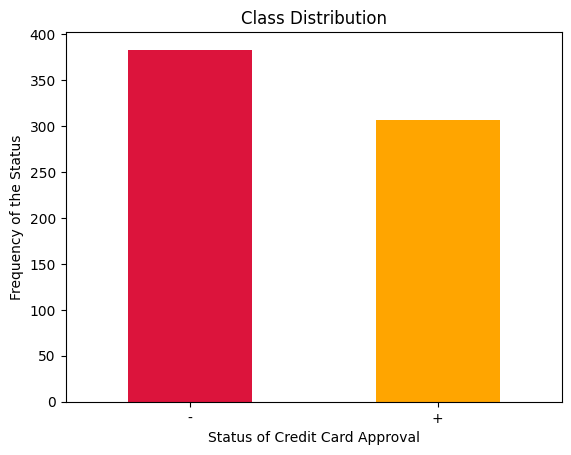

In [11]:
df[15].value_counts().plot(kind="bar",
                           title="Class Distribution",
                           xlabel="Status of Credit Card Approval",
                           ylabel="Frequency of the Status",
                           color=["crimson","orange"],
                           rot=0)
plt.show()

# Pre-processing

## Handling Missing Values

In [12]:
df = df.replace({"?":None})

In [13]:
df = df.dropna()

## Encoding the columns

In [17]:
encoder = OneHotEncoder(sparse_output=False)
for i in cat_cols:
    df[i] = encoder.fit_transform(df[i].values.reshape(-1,1))

In [18]:
df = df.reset_index()

# Test Train Split

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,
    df[15],
    test_size = 0.10,
    train_size=0.90,
    random_state = 0
)
X_train.pop(15)
X_test.pop(15)

535    1.0
492    1.0
14     1.0
247    0.0
85     0.0
      ... 
506    0.0
266    0.0
155    1.0
403    0.0
18     1.0
Name: 15, Length: 66, dtype: float64

In [20]:
X_train

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
436,459,1.0,0.0,0.290,0.0,0.0,0.0,0.0,1.500,0.0,1.0,0,1.0,0.0,1.0,0
75,76,1.0,0.0,6.500,0.0,0.0,1.0,1.0,0.125,0.0,0.0,0,1.0,0.0,1.0,0
55,55,0.0,0.0,11.625,0.0,0.0,0.0,0.0,0.835,0.0,0.0,0,1.0,0.0,1.0,300
49,49,0.0,0.0,0.665,0.0,0.0,1.0,0.0,0.165,0.0,1.0,0,1.0,1.0,1.0,0
589,623,1.0,0.0,0.000,0.0,0.0,1.0,0.0,0.665,0.0,1.0,0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,9,0.0,0.0,4.915,0.0,0.0,0.0,0.0,3.165,0.0,0.0,0,1.0,0.0,1.0,1442
359,377,1.0,0.0,0.835,0.0,0.0,0.0,0.0,2.000,0.0,1.0,0,1.0,0.0,0.0,0
192,197,0.0,0.0,7.625,0.0,0.0,1.0,0.0,15.500,0.0,0.0,12,0.0,1.0,1.0,790
629,665,1.0,0.0,0.040,0.0,0.0,0.0,0.0,0.040,0.0,1.0,0,1.0,1.0,1.0,0


# Perceptron

In [21]:
class Perceptron:
    
    # Initialising the required parameters for the perceptron.
    def __init__(self, X, y, learning_rate, epochs : int):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    # Activation function.
    def __activation_function(self,x):
        return 1.0 if (x > 0) else 0.0
    
    # The model training or fitting by updating weights.
    def fit(self):
        n_rows,n_cols = self.X.shape
        self.weights = np.zeros((n_cols + 1, 1))
        for epoch in range(self.epochs):
            for index, features in enumerate(self.X.values):
                feature_transposed = np.insert(features, 0, 1).reshape(-1,1)
                predicted_target = self.__activation_function(np.dot(feature_transposed.T, self.weights))
                flag = np.squeeze(predicted_target) - self.y[index]
                if flag != 0:
                    self.weights += self.learning_rate*((self.y[index] - predicted_target)*feature_transposed)
    
    # Predicting on a single instance.
    def predict(self, X_test):
        return self.__activation_function(np.dot(p.weights.reshape(1,-1)[0],X_test))
    
    # Predicting on a larger number of instances and returning accuracy.
    def test(self, test_data, y):
        x = []
        for i in range(len(test_data.values)):
            X_test = np.array(test_data.iloc[i])
            x.append(p.predict(np.insert(X_test,0,1)) == p.y[i])
        return sum(x)*100/len(test_data)

# Initialising the Perceptron Parameters

In [22]:
y = np.array(pd.DataFrame(y_train).reset_index().drop(["index"],axis=1))
X = pd.DataFrame(X_train).reset_index().drop(["index"],axis=1)
p = Perceptron(X, y, 0.5, 50)

# Fitting the model

In [23]:
p.fit()

# Test Accuracy

In [24]:
p.test(pd.DataFrame(X_test).reset_index().drop(["index"],axis=1),
     np.array(pd.DataFrame(y_test).reset_index().drop(["index"],axis=1)))

array([48.48484848])

# Train Accuracy

In [25]:
p.test(X,y)

array([73.59454855])

# Tuning the number of epochs

In [26]:
train_acc = []
test_acc = []
epochs = []

for i in range(20,200,20):
    y = np.array(pd.DataFrame(y_train).reset_index().drop(["index"],axis=1))
    X = pd.DataFrame(X_train).reset_index().drop(["index"],axis=1)
    p = Perceptron(X, y, 0.5, i)
    p.fit()
    train_acc.append(p.test(X,y))
    test_acc.append(p.test(pd.DataFrame(X_test).reset_index().drop(["index"],axis=1),
     np.array(pd.DataFrame(y_test).reset_index().drop(["index"],axis=1))))
    epochs.append(i)

# Train-Test Accuracies across different epochs

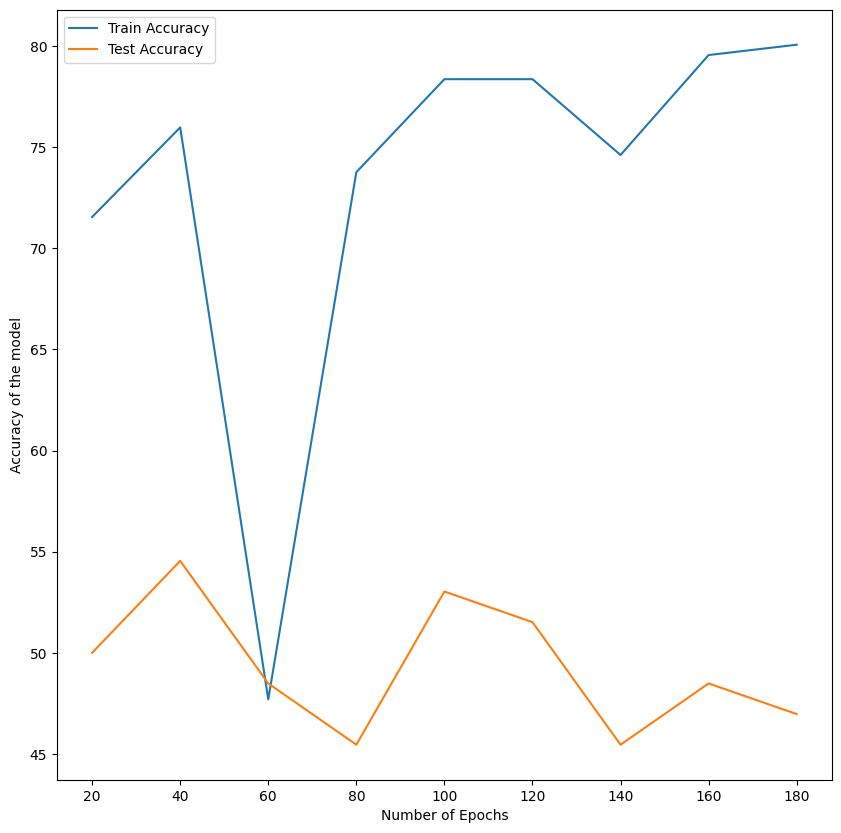

In [27]:
plt.figure(figsize=(10,10))
plt.plot(epochs,train_acc)
plt.plot(epochs,test_acc)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy of the model")
plt.legend(['Train Accuracy',"Test Accuracy"])
plt.show()

# Final Model

In [28]:
tuning = pd.DataFrame({"epochs":np.array(epochs).squeeze(),"train accuracy":np.array(train_acc).squeeze(), "test accuracy":np.array(test_acc).squeeze()})

In [29]:
def diff(row):
    return row[1] - row[2]

In [30]:
tuning["Difference"] = tuning.apply(diff,axis=1)

C:\Users\ch.en.u4aie22020\AppData\Local\Temp\ipykernel_7464\844949158.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return row[1] - row[2]


In [31]:
tuning.sort_values(by="Difference")

,epochs,train accuracy,test accuracy,Difference
2,60,47.700170,48.484848,-0.784678
1,40,75.979557,54.545455,21.434103
0,20,71.550256,50.000000,21.550256
4,100,78.364566,53.030303,25.334263
5,120,78.364566,51.515152,26.849414
3,80,73.764906,45.454545,28.310361
6,140,74.616695,45.454545,29.162150
7,160,79.557070,48.484848,31.072221
8,180,80.068143,46.969697,33.098446


The best model is the one which is trained for 40 epochs. There can be many other hyperparameters but since Perceptron is coded from scratch those cannot be incorporated. The one with 80 epoches is not considered since the train accuracy must be greater than the test accuracy because the model is trained on the former.

# References

About Perceptron : https://analyticsindiamag.com/perceptron-is-the-only-neural-network-without-any-hidden-layer/

For Perceptron from scratch : https://towardsdatascience.com/perceptron-algorithm-in-python-f3ac89d2e537

Dataset : https://archive.ics.uci.edu/ml/datasets/credit+approval